In [65]:
%matplotlib inline
import os
import sys 
from pathlib import Path

import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rcParams["figure.figsize"] = (16,8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
import yellowbrick as yb 

# Feature Analysis Visualizers

In [ ]:
df = pd.read_csv("data/concrete/concrete.csv")

features = [
    "cement", 
    "slag", 
    "ash", 
    "water", 
    "splast", 
    "coarse", 
    "fine", 
    "age"
]

target = "strength"
X = df[features]
y = df[target]

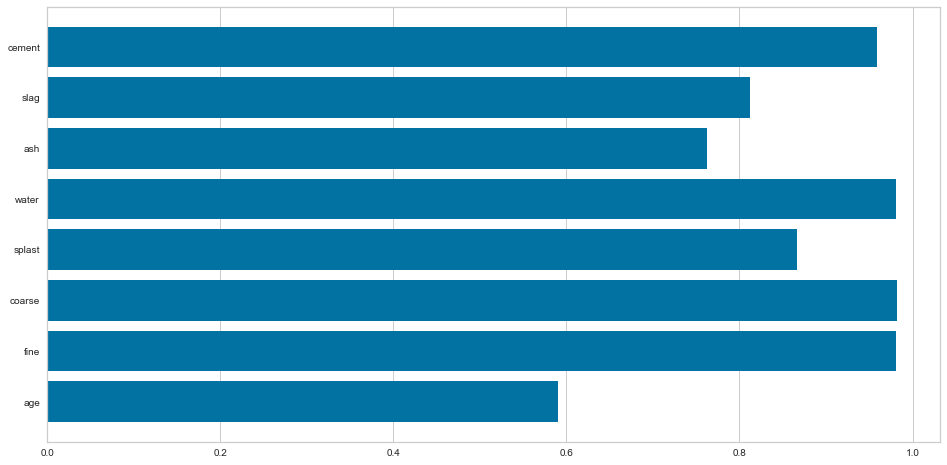

In [22]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.transform(X);

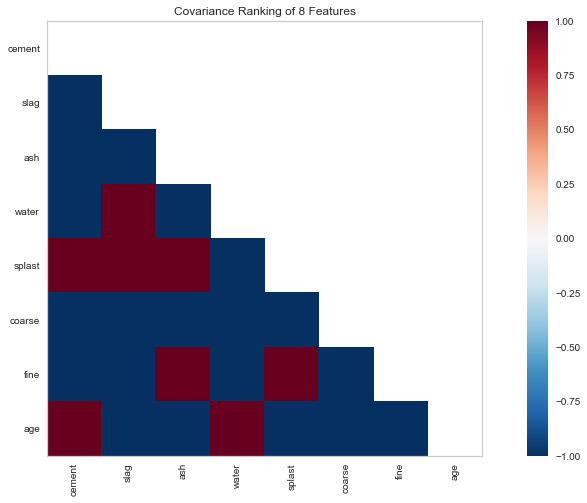

In [23]:
from yellowbrick.features import Rank2D 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.transform(X);

In [4]:
df = pd.read_csv("data/occupancy/occupancy.csv")

features = [
    "temperature",
    "relative humidity",
    "light",
    "C02",
    "humidity"
]

target = "occupancy"
classes = [0, 1]

X = df[features]
y = df[target]

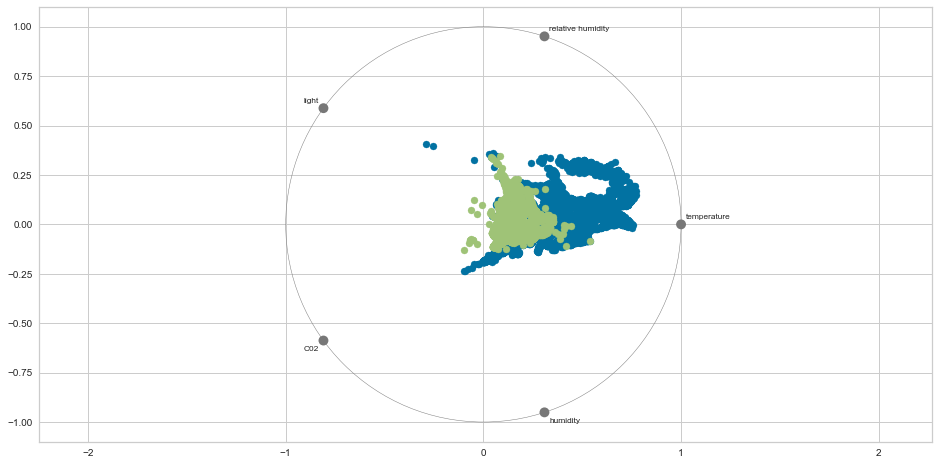

In [41]:
from yellowbrick.features import RadViz
visualizer = RadViz(classes=classes, features=features)
visualizer.fit(X, y)

visualizer.transform(X);

In [9]:
df = pd.read_csv("data/credit/credit.csv")

features = [
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay',
]

target = "default"

X = df[features]
y = df[target]

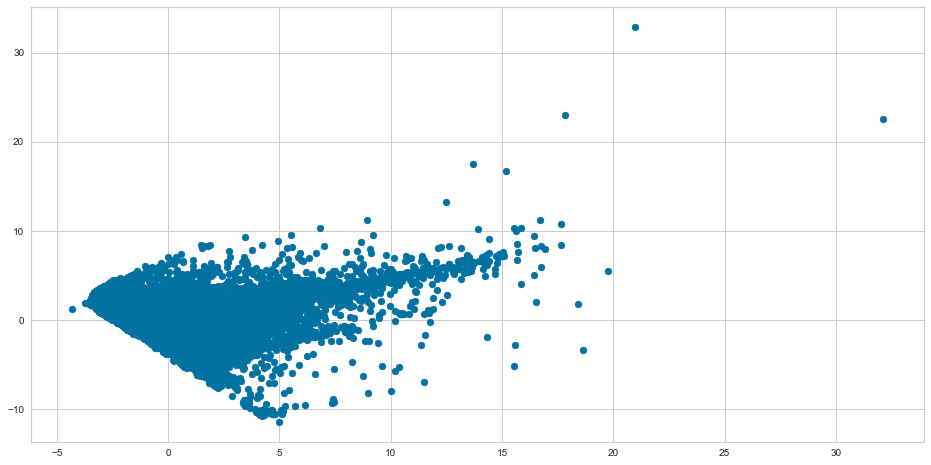

In [10]:
from yellowbrick.features import PCADecomposition
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y);

# Regression Visualizers: 回帰モデルの可視化

In [11]:
from sklearn.model_selection import cross_val_predict, train_test_split
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

In [34]:
df = pd.read_csv("data/energy/energy.csv")

features = [
    "relative compactness", 
    "surface area", 
    "wall area", 
    "roof area", 
    "overall height", 
    "orientation", 
    "glazing area", 
    "glazing area distribution"
]

target = "heating load"
X = df[features]
y = df[target]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

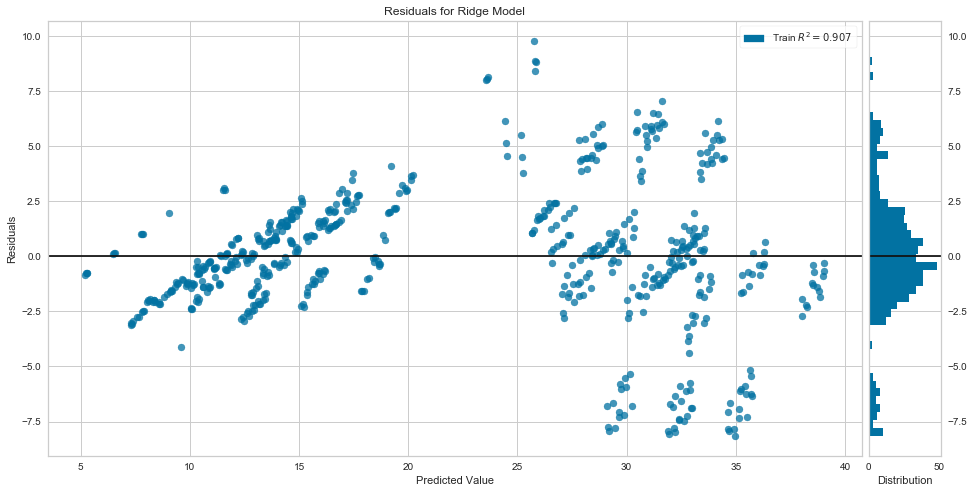

In [36]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.poof();

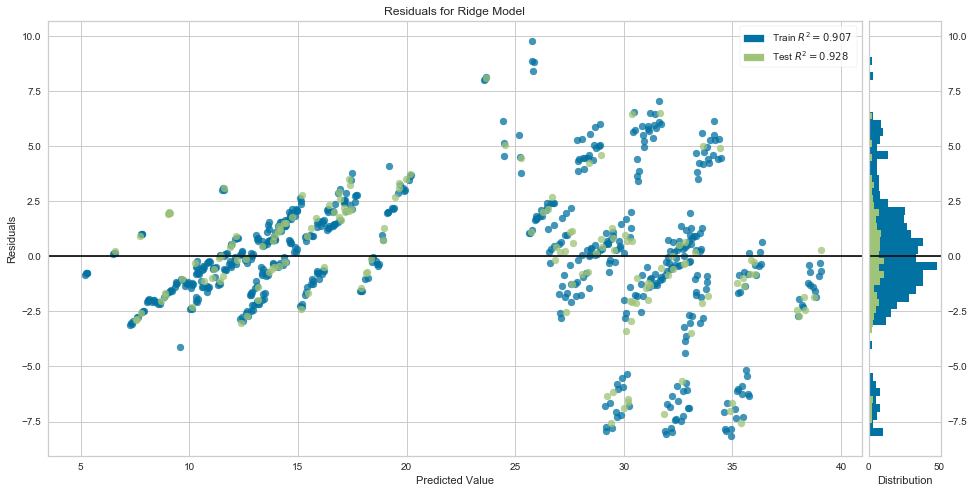

In [37]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

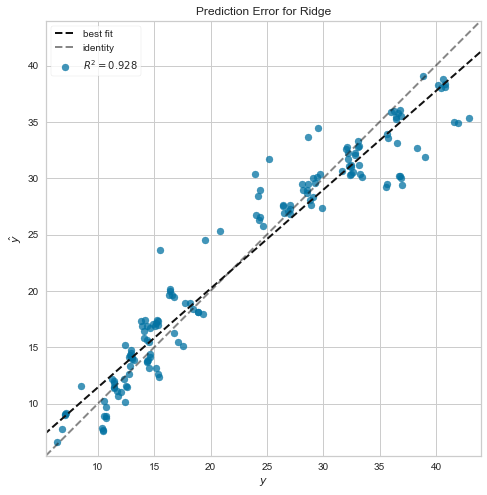

In [38]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

model = Ridge()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [47]:
df = pd.read_csv("data/concrete/concrete.csv")

features = [
    "cement", 
    "slag", 
    "ash", 
    "water", 
    "splast", 
    "coarse", 
    "fine", 
    "age"
]

target = "strength"
X = df[features]
y = df[target]

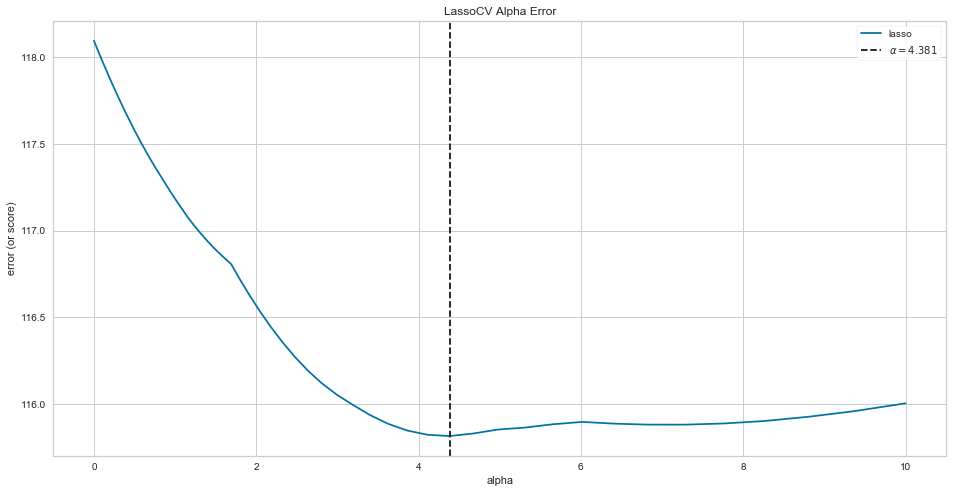

In [49]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)
visualizer.poof();

# Classification Visualizers: 分類モデルの可視化

In [51]:
df = pd.read_csv("data/occupancy/occupancy.csv")

features = [
    "temperature",
    "relative humidity",
    "light",
    "C02",
    "humidity"
]

target = "occupancy"
classes = [0, 1]

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

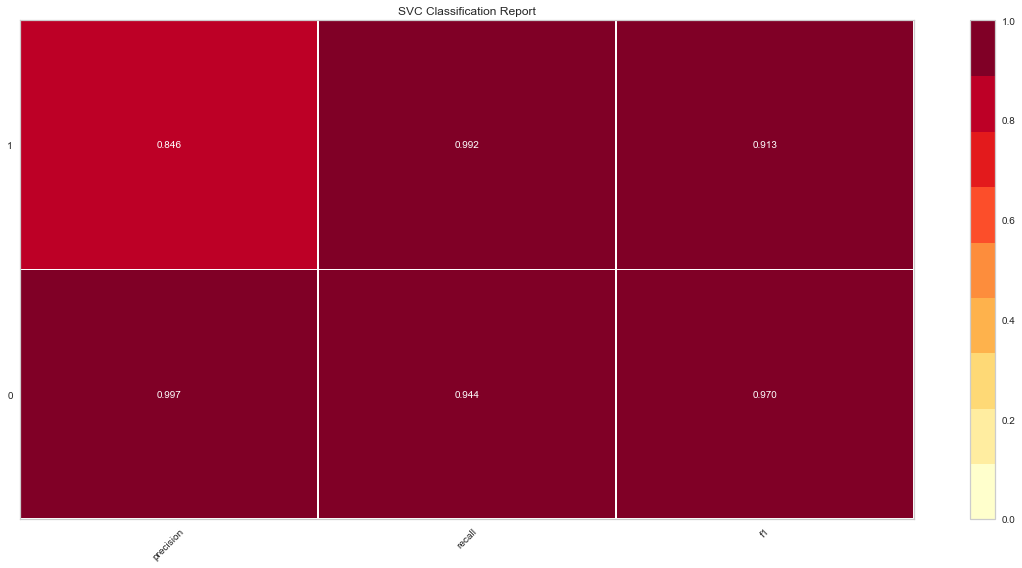

In [54]:
from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC

svc = SVC()
visualizer = ClassificationReport(svc, classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

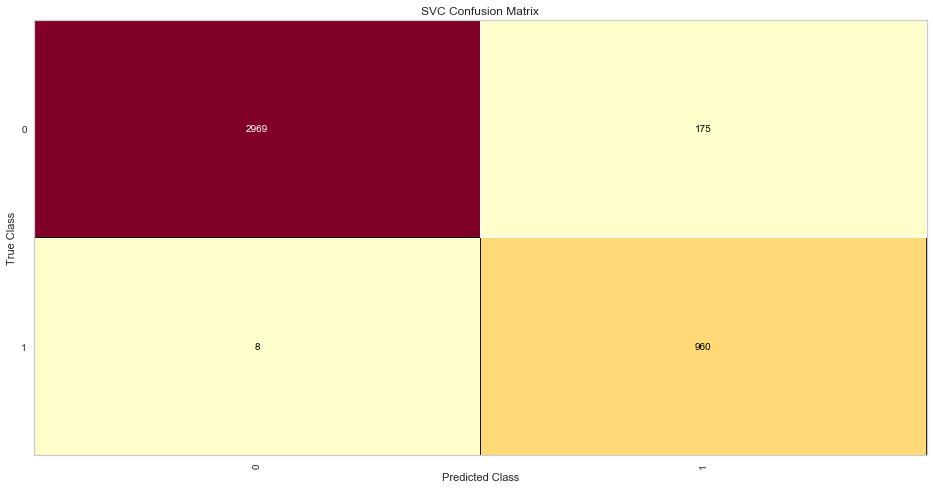

In [55]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC

svc = SVC()
visualizer = ConfusionMatrix(svc, classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [58]:
df = pd.read_csv("data/credit/credit.csv")

features = [
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay',
]

target = "default"

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

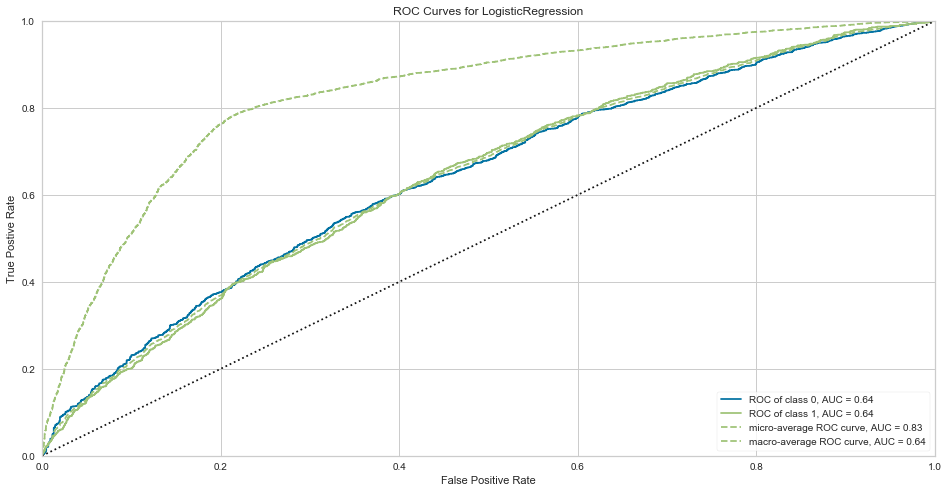

In [59]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression 

logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

# Text Modeling Visualizers: 言語モデリングの可視化

In [74]:
from sklearn.datasets.base import Bunch

hobbies_path = Path("data/hobbies")
categories = [
    cat for cat in hobbies_path.iterdir() 
    if cat.is_dir()
]

files  = [] # holds the file names relative to the root 
data   = [] # holds the text read from the file 
target = [] # holds the string of the category 

# Load the data from the files in the corpus 
for cat in categories:
    for file in cat.iterdir():
        files.append(file)
        target.append(cat.name)

        with open(file, 'r') as f:
            data.append(f.read())

corpus = Bunch(
    categories=categories,
    files=files,
    data=data,
    target=target,
)

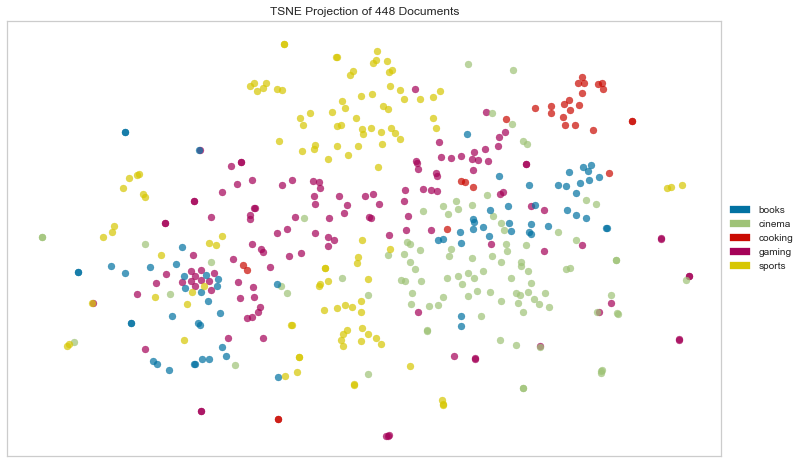

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(corpus.data)
labels = corpus.target

tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof();